# 0. The main purpose

The main purpose of these analyzes is to understand and discover the behavior of customers in online and in-store shopping from different regions. 

# 1. Importing necessary modules

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


#Machine learning packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 2. Reading data

In [2]:
data = pd.read_csv('Demographic_Data.csv')

# 3. Exploring data

Displaying first five rows of data

In [3]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


Displaying statistical values of the dataset

In [4]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


### The dataset contains 80,000 records and five columns:
### a) in-store - the bool value determines whether the purchase was made online or in-store 
### b) age - the age of the client (min 18 max 85)
### c) items - number of items purchased (min 1 max 8)
### d) amout - amount paid (min 5.0047 max 3000) 
### e) region - a categorical, nominal variable specifies one of 4 regions (North, South, East, West) 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [6]:
data[data.duplicated(keep='first')]

,in-store,age,items,amount,region
17858,0,76,6,283.61,2
26112,0,67,4,320.41,2
29343,1,23,2,1019.50,4
33834,1,38,3,1993.80,1
34214,1,31,5,1488.10,4
34706,0,39,5,1268.00,4
35971,0,38,7,391.51,2
43958,1,22,1,1303.20,4
44308,1,26,5,1495.70,4
45164,0,79,6,342.28,2


In [7]:
data = data.drop_duplicates()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


### 21 duplicates were removed from the dataset. I decided to remove all duplicates, because the amount of duplicates were not high and indexes of transactions were different (not in sequence).

In [9]:
data.nunique()

in-store        2
age            68
items           8
amount      56112
region          4
dtype: int64

In [10]:
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


### Dataset do not contain missing values

# 4. Features extraction

Age rounded to nearest tenth

In [11]:
data['age_round'] = ((data['age']/10).round()*10).astype(int)

Amount spend per item

In [12]:
data['amount_per_item'] = data['amount']/data['items']

Counting people in each age group (every 10 years).

In [13]:
age_counts = data['age_round'].value_counts().sort_index()

# 5. Data visualization

## Simple visualization of data

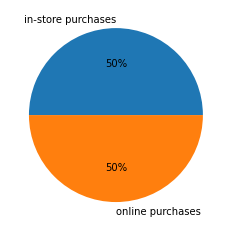

In [14]:
labels = ["in-store purchases", "online purchases"]

plt.pie([data[data['in-store']==1]['in-store'].count(), data[data['in-store']==0]['in-store'].count()], labels=labels, autopct='%1.0f%%')
plt.show()

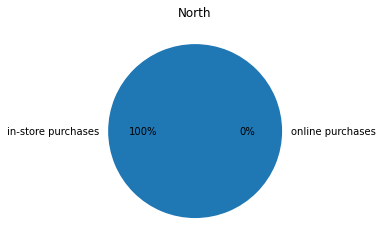

In [15]:
labels = ["in-store purchases", "online purchases"]

plt.pie([data[(data['in-store']==1)&(data['region']==1)]['in-store'].count(), data[(data['in-store']==0)&(data['region']==1)]['in-store'].count()], labels=labels, autopct='%1.0f%%')
plt.title("North")
plt.show()

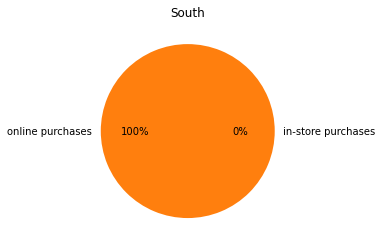

In [16]:
labels = ["in-store purchases", "online purchases"]

plt.pie([data[(data['in-store']==1)&(data['region']==2)]['in-store'].count(), data[(data['in-store']==0)&(data['region']==2)]['in-store'].count()], labels=labels, autopct='%1.0f%%')
plt.title("South")
plt.show()

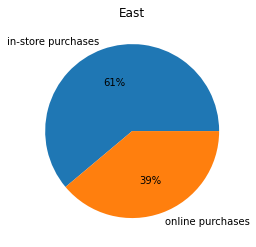

In [17]:
labels = ["in-store purchases", "online purchases"]

plt.pie([data[(data['in-store']==1)&(data['region']==3)]['in-store'].count(), data[(data['in-store']==0)&(data['region']==3)]['in-store'].count()], labels=labels, autopct='%1.0f%%')
plt.title("East")
plt.show()

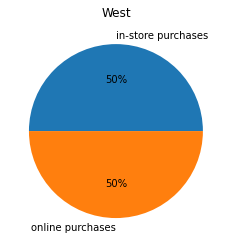

In [18]:
labels = ["in-store purchases", "online purchases"]

plt.pie([data[(data['in-store']==1)&(data['region']==4)]['in-store'].count(), data[(data['in-store']==0)&(data['region']==4)]['in-store'].count()], labels=labels, autopct='%1.0f%%')
plt.title("West")
plt.show()

### North customers buy only in-store, South customers buy only online. More than 60% of East customers buy instore. Half of West customers buy online.

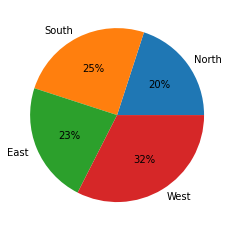

In [19]:
labels = ["North", "South", "East", "West"]

plt.pie([data[data['region']==1]['region'].count(), data[data['region']==2]['region'].count(), data[data['region']==3]['region'].count(), data[data['region']==4]['region'].count()], labels=labels, autopct='%1.0f%%')
plt.show()

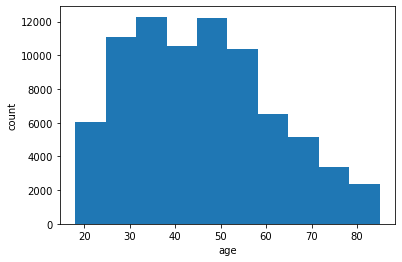

In [20]:
plt.hist(data['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.show()

### Age data histogram is Positively (Right) Skewed. 

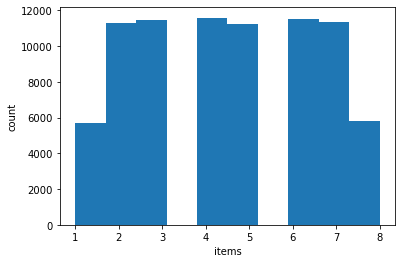

In [21]:
plt.hist(data['items'])
plt.xlabel('items')
plt.ylabel('count')
plt.show()

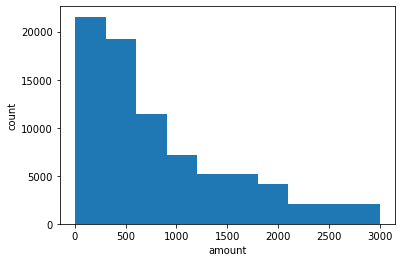

In [22]:
plt.hist(data['amount'])
plt.xlabel('amount')
plt.ylabel('count')
plt.show()

### Most often, less than 750 were spend when shopping.

# 6. Do customers in different regions spend more per transaction? Which regions spend the most/least?

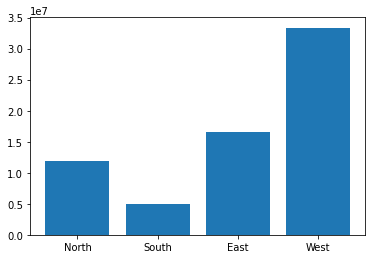

In [23]:
plt.bar(labels,data['amount'].groupby(data['region']).sum())
plt.show()

### The bar plot shows that customers from West spend the most per transaction and customers from South spend the least per transaction

# 7. Is there a relationship between the number of items purchased and amount spent?

In [24]:
data.corr('pearson')

,in-store,age,items,amount,region,age_round,amount_per_item
in-store,1.000000,-0.178180,-0.003897,-0.085573,-0.133171,-0.180490,-0.054597
age,-0.178180,1.000000,0.000657,-0.282033,-0.235370,0.983693,-0.187250
items,-0.003897,0.000657,1.000000,0.000384,-0.001904,0.000210,-0.469112
amount,-0.085573,-0.282033,0.000384,1.000000,0.403486,-0.276769,0.666868
region,-0.133171,-0.235370,-0.001904,0.403486,1.000000,-0.231827,0.269473
age_round,-0.180490,0.983693,0.000210,-0.276769,-0.231827,1.000000,-0.183685
amount_per_item,-0.054597,-0.187250,-0.469112,0.666868,0.269473,-0.183685,1.000000


### There are no Pearson correlation between items and amount, but there are observed correlation (not very strong) between age - in-store, region - items, region - age.

In [25]:
data.corr('spearman')

,in-store,age,items,amount,region,age_round,amount_per_item
in-store,1.000000,-0.161105,-0.003934,0.064018,-0.118973,-0.163983,0.065860
age,-0.161105,1.000000,0.000603,-0.289539,-0.230860,0.983411,-0.250395
items,-0.003934,0.000603,1.000000,-0.000380,-0.001707,0.000187,-0.456939
amount,0.064018,-0.289539,-0.000380,1.000000,0.401786,-0.285544,0.866432
region,-0.118973,-0.230860,-0.001707,0.401786,1.000000,-0.227792,0.346798
age_round,-0.163983,0.983411,0.000187,-0.285544,-0.227792,1.000000,-0.246700
amount_per_item,0.065860,-0.250395,-0.456939,0.866432,0.346798,-0.246700,1.000000


### There are no Spearman correlation between items and amount, but there are observed correlation (not very strong) between age - in-store, region - items, region - age.

In [26]:
data.cov()

,in-store,age,items,amount,region,age_round,amount_per_item
in-store,0.250003,-1.400071,-0.004017,-30.860425,-0.075019,-1.437305,-9.055042
age,-1.400071,246.966189,0.021270,-3196.782841,-4.167305,246.207072,-976.086822
items,-0.004017,0.021270,4.248751,0.570791,-0.004421,0.006902,-320.740893
amount,-30.860425,-3196.782841,0.570791,520221.252295,327.874873,-3179.312744,159544.095944
region,-0.075019,-4.167305,-0.004421,327.874873,1.269321,-4.159804,100.704315
age_round,-1.437305,246.207072,0.006902,-3179.312744,-4.159804,253.655719,-970.382868
amount_per_item,-9.055042,-976.086822,-320.740893,159544.095944,100.704315,-970.382868,110025.629587


# 8. More EDA

## Checking dependency between amount and items purchased online and in-store

<BarContainer object of 2 artists>

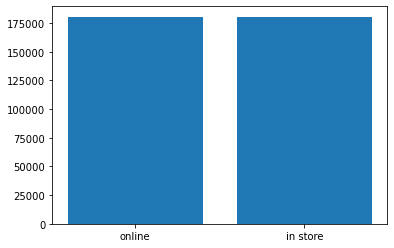

In [27]:
plt.bar(['online', 'in store'],data['items'].groupby(data['in-store']).sum())

<BarContainer object of 2 artists>

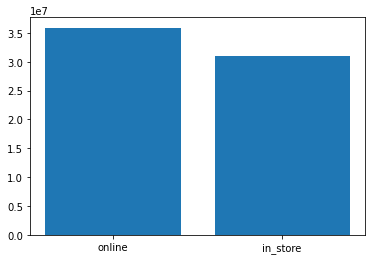

In [28]:
plt.bar(['online', 'in_store'],data['amount'].groupby(data['in-store']).sum())

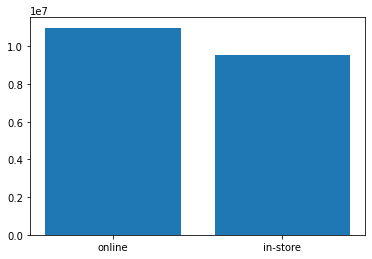

In [29]:
plt.bar(['online', 'in-store'],data['amount_per_item'].groupby(data['in-store']).sum())
plt.show()

### Total number of items purchased online is same as total number of items purchased online, but customers spend more money during online shoping, because they choose more expensive products than in in-store shopping.

## Checking dependency between age and items, amount and amount per item

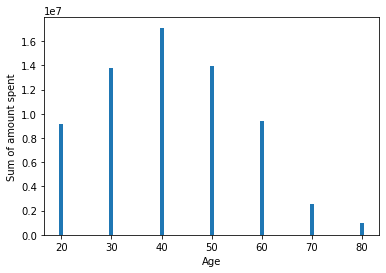

In [30]:
plt.bar(data['amount'].groupby(data['age_round']).sum().index, data['amount'].groupby(data['age_round']).sum().values)
plt.xlabel('Age')
plt.ylabel('Sum of amount spent')
plt.show()

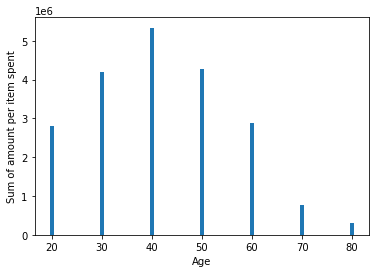

In [31]:
plt.bar(data['amount_per_item'].groupby(data['age_round']).sum().index, data['amount_per_item'].groupby(data['age_round']).sum().values)
plt.xlabel('Age')
plt.ylabel('Sum of amount per item spent')
plt.show()

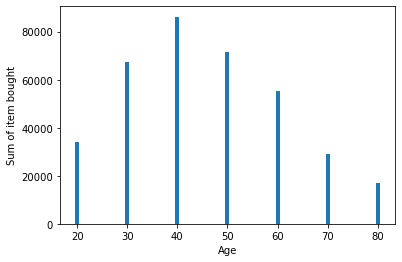

In [32]:
plt.bar(data['items'].groupby(data['age_round']).sum().index, data['items'].groupby(data['age_round']).sum().values)
plt.xlabel('Age')
plt.ylabel('Sum of item bought')
plt.show()

### The bar plots shows that distribution beetween three selected dependencies does not change. Due to the unequal size of age groups, further analyzes are needed, especially taking into account the value per person.

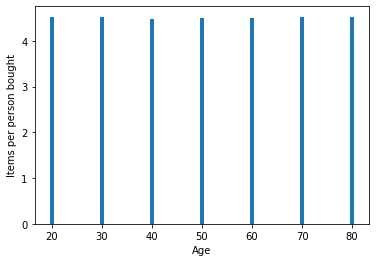

In [33]:
plt.bar(data['items'].groupby(data['age_round']).sum().index, data['items'].groupby(data['age_round']).sum().values/age_counts.values)
plt.xlabel('Age')
plt.ylabel('Items per person bought')
plt.show()

### In each age group, customers buy on average the same number of products per person.

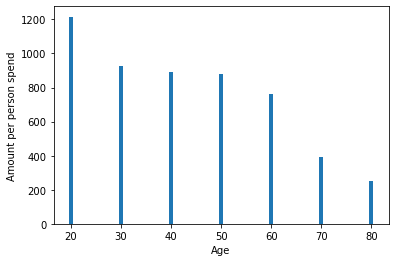

In [34]:
plt.bar(data['amount'].groupby(data['age_round']).sum().index, data['amount'].groupby(data['age_round']).sum().values/age_counts.values)
plt.xlabel('Age')
plt.ylabel('Amount per person spend')
plt.show()

### The bar plot shows that younger people spend in average more money

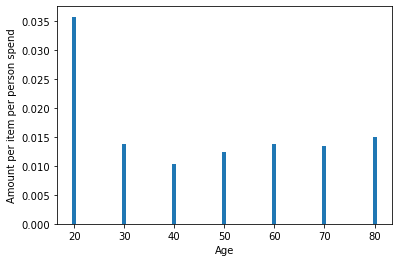

In [35]:
plt.bar(data['amount'].groupby(data['age_round']).sum().index, data['amount'].groupby(data['age_round']).sum().values/data['items'].groupby(data['age_round']).sum().values/age_counts.values)
plt.xlabel('Age')
plt.ylabel('Amount per item per person spend')
plt.show()

### The bar plot shows that younger people spend in average more money per item.

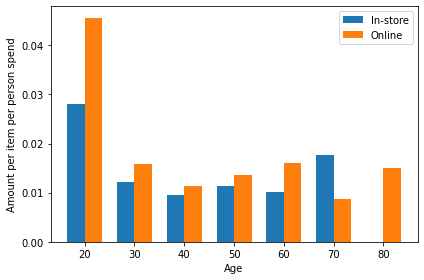

In [36]:
instore = data['amount'][data['in-store']==True].groupby(data['age_round']).sum().index, data['amount'][data['in-store']==True].groupby(data['age_round']).sum().values/data['items'][data['in-store']==True].groupby(data['age_round']).sum().values/age_counts.values[:-1]
online = data['amount'][data['in-store']==False].groupby(data['age_round']).sum().index, data['amount'][data['in-store']==False].groupby(data['age_round']).sum().values/data['items'][data['in-store']==False].groupby(data['age_round']).sum().values/age_counts.values
labels = age_counts.index
x_instore = np.arange(len(labels[:-1]))
x_online = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x_instore - width/2, instore[1], width, label='In-store')
rects2 = ax.bar(x_online + width/2, online[1], width, label='Online')

ax.set_ylabel('Amount per item per person spend')
ax.set_xlabel('Age')
ax.set_xticks(x_online)
ax.set_xticklabels(labels.astype(int))
ax.legend()

fig.tight_layout()

plt.show()

### Presented graph shows that:
### a) People older than 80 years old do not buy in-store
### b) Only people in their seventies bought more expensive products in-store than online
### c) People from 30-60 years old spend more less the same in-store and online per one product
### d) Youngest people spend more per item online than in-store

## Comparision of amount spend in-store and onlne by East and West customers (North and South customers are skipped because they choose only one method of buying)

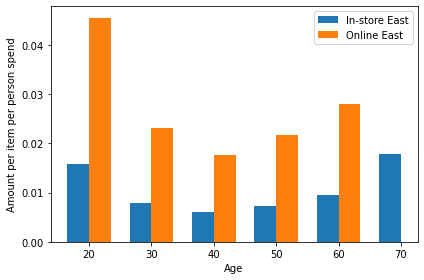

In [37]:
instore_reg3 = data['amount'][(data['in-store']==True)&(data['region']==3)].groupby(data['age_round']).sum().index, data['amount'][(data['in-store']==True)&(data['region']==3)].groupby(data['age_round']).sum().values/data['items'][(data['in-store']==True)&(data['region']==3)].groupby(data['age_round']).sum().values/age_counts.values[:-1]
online_reg3 = data['amount'][(data['in-store']==False)&(data['region']==3)].groupby(data['age_round']).sum().index, data['amount'][(data['in-store']==False)&(data['region']==3)].groupby(data['age_round']).sum().values/data['items'][(data['in-store']==False)&(data['region']==3)].groupby(data['age_round']).sum().values/age_counts.values[:-2]
labels = age_counts.index
x_instore = np.arange(len(labels[:-1]))
x_online = np.arange(len(labels[:-2]))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x_instore - width/2, instore_reg3[1], width, label='In-store East')
rects2 = ax.bar(x_online + width/2, online_reg3[1], width, label='Online East')

ax.set_ylabel('Amount per item per person spend')
ax.set_xlabel('Age')
ax.set_xticks(x_instore)
ax.set_xticklabels(labels[:-1].astype(int))
ax.legend()

fig.tight_layout()

plt.show()

### People from East spend in average more amount per item online besides 70 yo people which do not buy online

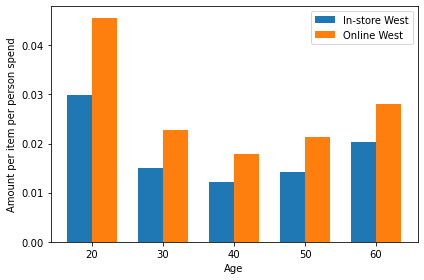

In [38]:
instore_reg3 = data['amount'][(data['in-store']==True)&(data['region']==4)].groupby(data['age_round']).sum().index, data['amount'][(data['in-store']==True)&(data['region']==4)].groupby(data['age_round']).sum().values/data['items'][(data['in-store']==True)&(data['region']==4)].groupby(data['age_round']).sum().values/age_counts.values[:-2]
online_reg3 = data['amount'][(data['in-store']==False)&(data['region']==4)].groupby(data['age_round']).sum().index, data['amount'][(data['in-store']==False)&(data['region']==4)].groupby(data['age_round']).sum().values/data['items'][(data['in-store']==False)&(data['region']==4)].groupby(data['age_round']).sum().values/age_counts.values[:-2]
labels = age_counts.index[:-2]
x_instore = np.arange(len(labels))
x_online = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x_instore - width/2, instore_reg3[1], width, label='In-store West')
rects2 = ax.bar(x_online + width/2, online_reg3[1], width, label='Online West')

ax.set_ylabel('Amount per item per person spend')
ax.set_xlabel('Age')
ax.set_xticks(x_instore)
ax.set_xticklabels(labels.astype(int))
ax.legend()

fig.tight_layout()

plt.show()

### People from West spend in average more amount per item online.

## Comparision of customers age in different regions

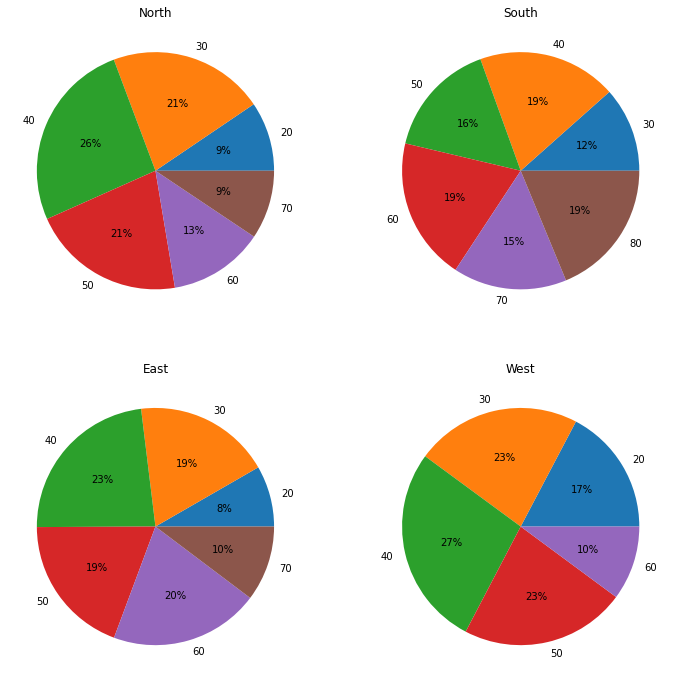

In [39]:
age_counts_north = data['age_round'][data['region']==1].value_counts().sort_index()
age_counts_south = data['age_round'][data['region']==2].value_counts().sort_index()
age_counts_east = data['age_round'][data['region']==3].value_counts().sort_index()
age_counts_west = data['age_round'][data['region']==4].value_counts().sort_index()


plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.pie(np.array(age_counts_north.values), labels=age_counts_north.index, autopct='%1.0f%%')
plt.title('North')
plt.subplot(2,2,2)
plt.pie(np.array(age_counts_south.values), labels=age_counts_south.index, autopct='%1.0f%%')
plt.title('South')
plt.subplot(2,2,3)
plt.pie(np.array(age_counts_east.values), labels=age_counts_east.index, autopct='%1.0f%%')
plt.title('East')
plt.subplot(2,2,4)
plt.pie(np.array(age_counts_west.values), labels=age_counts_west.index, autopct='%1.0f%%')
plt.title('West')
plt.show()

### There are no visible outliers. Not all regions have the same age groups.

# 10. Conclusions

### The dataset contained 21 duplicates which were removed but do not contain missing data. During the analysis of the collection, it was noticed that customers from the north only buy in-store, while customers from the south choose online shopping. Customers from other regions buy both online and in-store. There was no correlation between items and amount, but there were some relationships between other variables such as: age - in-store, region - items, region - age. Total number of items purchased online is same as total number of items purchased online, but customers spend more money during online shoping, because they choose more expensive products than in in-store shopping or it is effect of added shipping costs to amout of items. It may also be due to the higher price of products in the online store. In each age group, customers buy on average the same number of products per person, but younger peoples spend more money than older. Additional analyzes show that people older than 80 years old do not buy in-store, only people in their seventies bought more expensive products in-store than online, people from 30-60 years old spend more less the same in-store and online per one product and youngest people spend more per item online than in-store. Analyzes have shown that customers spend more online. Overall, there were large differences between regions. Both taking into account the type of purchases and the age groups of customers. Due to these differences, it would be necessary to carry out detailed analyzes for each of the regions separately. One example would be to find out why in the North and South regions customers only shop in-store or only online. This may be due to the lack of availability of another purchasing method. Another issue to be clarified could be the shipping cost included in the amount of online purchases (the question is whether it is added, how much is it, etc.), and then preparing the data without shipping costs.

# 11. Are there differences in the age of customers between regions?

# 10. Modeling - Classification

In [53]:
X = data[['region']]
y = data['age_round']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

## 10 a) Decision Tree Classifier

In [56]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.24511127781945485
